# env: pycro-manager

In [1]:
from pycromanager import Core
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image
from scipy.ndimage import maximum_filter

In [3]:
core = Core()

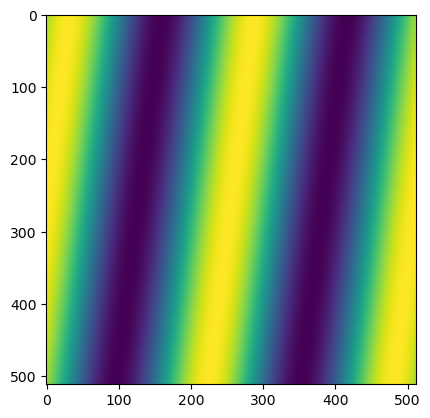

In [10]:
core.snap_image()
tagged_image = core.get_tagged_image()
pixels = np.reshape(tagged_image.pix,
                        newshape=[tagged_image.tags['Height'], tagged_image.tags['Width']])
plt.imshow(pixels)

In [11]:
type(pixels)

numpy.ndarray

In [12]:
def get_2dmaxima(image,kernelsize=3):
    """Get maximas of local image

        Parameters:
        image (ndarray): image to get localmaximas of
        kernelsize (int): size of filter used to find local maximas

        Returns:
        ndarray: local maximas of image
    """
    return image == maximum_filter(image, footprint=np.ones((kernelsize,kernelsize)))


In [13]:

def get_coord_maxima(image):
    """Get coordinates of local maximas

        Parameters:
        image (ndarray): local maximas

        Returns: list of local maxima coordinates
        
    """
    index = np.where(image!= 0)
    coord = list(zip(index[0], index[1]))
    return coord

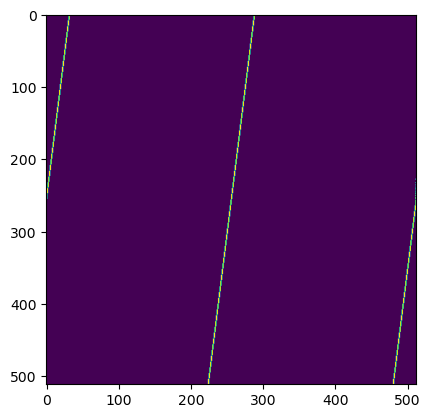

In [14]:
im = get_2dmaxima(pixels)
plt.imshow(im)

In [54]:
halfim = im[:len(im)//50]

In [56]:
list = get_coord_maxima(halfim)

In [59]:
list

[(0, 32),
 (0, 288),
 (1, 31),
 (1, 32),
 (1, 287),
 (1, 288),
 (2, 31),
 (2, 32),
 (2, 287),
 (2, 288),
 (3, 31),
 (3, 32),
 (3, 287),
 (3, 288),
 (4, 31),
 (4, 32),
 (4, 287),
 (4, 288),
 (5, 31),
 (5, 32),
 (5, 287),
 (5, 288),
 (6, 31),
 (6, 32),
 (6, 287),
 (6, 288),
 (7, 31),
 (7, 32),
 (7, 287),
 (7, 288),
 (8, 31),
 (8, 287),
 (9, 30),
 (9, 31),
 (9, 286),
 (9, 287)]

In [39]:
xcord = core.get_x_position()

In [40]:
ycord = core.get_y_position()

In [28]:
#pixel size in total
pix = int(core.get_property('Camera', 'OnCameraCCDXSize'))

In [30]:
#mm / pixel
scale =core.get_pixel_size_um()

In [31]:
pix*scale

128.0

In [64]:
def offset(list):
    #stage coord = imCoord * a + b
    #a = mm per pixel, b = x (or y) - total pix *mm per pix
    
    #pixel size in total
    pix = int(core.get_property('Camera', 'OnCameraCCDXSize'))
    
    #mm / pixel
    scale =core.get_pixel_size_um()
    
    mm = pix*scale
    
    #in actual implementation would be coord from orig input to grid-coord-maker
    x_origin = core.get_x_position()
    y_origin = core.get_y_position()
    
    new_list = []
    
    for i in list:
        new_x = i[0] * scale + (x_origin-mm)
        new_y = i[1] * scale + (y_origin-mm)
        new_list.append((new_x,new_y))
    
    return new_list
        
    
    

In [65]:
offset(list)

[(-124.535, -114.06),
 (-124.535, -50.06),
 (-124.285, -114.31),
 (-124.285, -114.06),
 (-124.285, -50.31),
 (-124.285, -50.06),
 (-124.035, -114.31),
 (-124.035, -114.06),
 (-124.035, -50.31),
 (-124.035, -50.06),
 (-123.785, -114.31),
 (-123.785, -114.06),
 (-123.785, -50.31),
 (-123.785, -50.06),
 (-123.535, -114.31),
 (-123.535, -114.06),
 (-123.535, -50.31),
 (-123.535, -50.06),
 (-123.285, -114.31),
 (-123.285, -114.06),
 (-123.285, -50.31),
 (-123.285, -50.06),
 (-123.035, -114.31),
 (-123.035, -114.06),
 (-123.035, -50.31),
 (-123.035, -50.06),
 (-122.785, -114.31),
 (-122.785, -114.06),
 (-122.785, -50.31),
 (-122.785, -50.06),
 (-122.535, -114.31),
 (-122.535, -50.31),
 (-122.285, -114.56),
 (-122.285, -114.31),
 (-122.285, -50.56),
 (-122.285, -50.31)]